<a href="https://colab.research.google.com/github/ohyunju/projects/blob/ohyunju-patch-1/project1/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1일차

---



 ## 프로젝트에 꼭 포함되야 하는 내용
1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스


---



## 학습 계획
* 1일차 : EDA(데이터 전처리) 및 데이터를 가지고 할 수 있는 계획 수립
* 2일차 : Hypothesis Test, CI, Bayesian, DR, PCA, Cluster 및 시각화
* 3일차 : Hypothesis Test, CI, Bayesian, DR, PCA, Cluster 및 시각화
* 4일차 : 스크립트 제작 및 영상물 촬영


---



In [1]:
import pandas as pd

url='https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv(url)

# Unnamed: 0 는 단순 인덱스넘버이므로 삭제
df = df.drop('Unnamed: 0', axis = 1) 
df.isnull().sum()
# 'Year' 271 / 'Genre' 50 / 'Publisher' 58 의 널값 존재, 전체 가짓 수(16598)에 비해 작다고 판단, 결측치 드랍
df_man=df.dropna()
# 칼럼명 'Name','Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales' 

print(df_man.info())
df_man.head() #(16241 rows × 9 columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB
None


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


## 계획 수립
1. 지역에 따라서 선호하는 게임 장르가 다를까 
> **파이그래프**로 각 지역에 따른 분포를 보여주기, 4개의 지역에 따른 선호 장르를 차이를 따지기 위해 **ANOVA**사용 
2. 연도별 게임의 트렌드가 있을까 (게임의 트렌드라는 말을 장르로 인식) 
> 4가지의 Sales 칼럼을 모두 모은 Total_Sales 칼럼을 만들어, *x=출시연도 & y=Total_Sales & hue=장르*로 **선그래프**로시각화, 연도와 토탈세일에 대한 차이가 있는지 확인하기 위해 **T-test** 나 **chi-square-test**, **chi2_contingency**사용
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 
> 위에서 만든 Total_Sales 라는 칼럼을 이용, **누적그래프**를 이용해서 출고량이 제일 많다는 것 보여주기, 출고량 상위 30가지 항목이용
4. 연도별 플랫폼에도 트렌드가 있을까 
> 4가지의 Sales 칼럼을 모두 모은 Total_Sales 칼럼을 만들어, *x=출시연도 & y=Total_Sales & hue=플랫폼*으로 **선그래프**로시각화, 연도와 토탈세일에 대한 차이가 있는지 확인하기 위해 **T-test** 나 **chi-square-test**, **chi2_contingency**사용
5. 제일 선호되는 회사와 지역에 따라서 선호하는 회사가 다를까 
> 전체적으로 랭킹 상위30 (575개의 회사), **파이그래프**로 각 지역에 따른 분포를 보여주기, 4개의 지역에 따른 회사 선호 장르를 차이를 따지기 위해 **ANOVA**사용(자국의 회사를 선호하는지?, 자국인지는 구글링 해보기)
6. 출시이후 평균 판매량은 어떤지 확인하기, 전체적으로도, 지역별로 그룹해서도, 또한 순위 재평가(상위 30개 게임)
> 출시이후 평균 판매량=총판매량/(지금년도-출시년도+1) 라는 수식을 사용(지금의 판매량은 누적이기 때문에 늦게 출시된 제품의 판매량이 떨어질 수 밖에 없다고 판단), 꾸준히 인기가 있는 게임이 있다면 원인은 무엇일까?

# + DR, PCA, Cluster 를 활용할 수 있는 방안 생각하기

### 결과 
이러한 분석들을 통해 전세계를 대상으로한 게임을 출시하려고 한다면 
  * 지역에 따라 게임의 장르, 플랫폼을 다르게 설정해야 하는지
  * 지금 트렌드의 장르로 개발하는 것이 맞는지 (연도별 장르의 추세를 보여줄 수 있는 선 그래프 활용, 약 40년의 기간을 5년의 기간으로 쪼개고 그동안의 장르(12개중 상위 3개씩) 변동 보여주는데 바 그래프 이용)
  * 위 질문에 대한 타탕성의 결과 어떤 게임을 출시해야 한다.


In [10]:
header=['Platform','Year','Genre','Publisher']
for i in header:
  df_check=df_man[i]
  df_check=df_check.drop_duplicates()
  print('길이',i,len(df_check))
  print(df_check)

# 플랫폼에 숫자(2600)가 있길래 잘못 입력인줄 알았는데 구글에 확인하니 이런 플랫폼이 존재 (아타리2600)
# 연도에 이상한 값 있음

길이 Platform 31
0          DS
1         Wii
2         PSP
4         PS3
6          PC
10         PS
11        GBA
18        PS4
20        PS2
22         XB
23       X360
25         GC
33        3DS
37       2600
46        SAT
52         GB
59        NES
65         DC
70        N64
72       XOne
86       SNES
133      WiiU
140       PSV
244       GEN
1034      SCD
2325       WS
2524       NG
7022     TG16
9578      3DO
14865      GG
15709    PCFX
Name: Platform, dtype: object
길이 Year 62
0        2008.0
1        2009.0
2        2010.0
5        2005.0
6        2011.0
          ...  
8144        2.0
8550       13.0
9276        0.0
10811      12.0
15985      94.0
Name: Year, Length: 62, dtype: float64
길이 Genre 12
0           Action
2        Adventure
3             Misc
4         Platform
5           Sports
6       Simulation
10          Racing
12    Role-Playing
13          Puzzle
16        Strategy
24        Fighting
27         Shooter
Name: Genre, dtype: object
길이 Publisher 575
0          

In [7]:
#'Year' 칼럼 100초과로 잡아줌, 전체 가짓 수(16241)에 비해 작다고 판단, 이상치 드랍
df1=df_man[df_man.Year >100]
df1.describe()
df1 #(16141 rows × 9 columns)

df1[10:20]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
11,Harvest Moon: More Friends of Mineral Town,GBA,2003.0,Simulation,Ubisoft,0.14,0.05,0,0
12,Mount & Blade,PC,2008.0,Role-Playing,Paradox Interactive,0,0.02,0,0
13,The Professor's Brain Trainer: Logic,DS,2005.0,Puzzle,505 Games,0.02,0,0,0
14,Zoids Dash,DS,2006.0,Role-Playing,Tomy Corporation,0,0,0.02,0
15,Mini Ninjas,PS3,2009.0,Action,Eidos Interactive,0.14,0.16,0,0.06
16,Rise of Nations,PC,2003.0,Strategy,Microsoft Game Studios,0.01,0.02,0,0.01
17,Hajime no Ippo: The Fighting! (2014),PS3,2014.0,Sports,Namco Bandai Games,0,0,0.03,0
18,Grand Kingdom,PS4,2015.0,Role-Playing,Nippon Ichi Software,0.02,0,0.03,0
19,Tropico Reloaded,PC,2009.0,Strategy,Kalypso Media,0,0.02,0,0


In [8]:
# Sales 값 들에 대한 데이터 전처리 (K,M)
Sales=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
df2=df1
print(len(df2)) 
print(len(df)) 

16141
16598


In [9]:
#시간 줄이는 간단한 방법이 없을까....ㅠㅠ
#인덱스 넘버는 0-16597(갯수는 16141) 개라 시간이 많이 소요****주의(내 컴기준 거의 5분)

for i in Sales:
  df2[i]=df2[i].str.replace('M','')
  for j in range(0,len(df)):
    try:
      if df2[i].str.contains('K')[j]:
        df2[i][j]=df2[i][j].replace('K','')
        df2[i][j]=pd.to_numeric(df2[i][j])*0.001   
    except:
      continue

df2[10:20] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(co

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,0.48,0.33,0,0.06
11,Harvest Moon: More Friends of Mineral Town,GBA,2003.0,Simulation,Ubisoft,0.14,0.05,0,0
12,Mount & Blade,PC,2008.0,Role-Playing,Paradox Interactive,0,0.02,0,0
13,The Professor's Brain Trainer: Logic,DS,2005.0,Puzzle,505 Games,0.02,0,0,0
14,Zoids Dash,DS,2006.0,Role-Playing,Tomy Corporation,0,0,0.02,0
15,Mini Ninjas,PS3,2009.0,Action,Eidos Interactive,0.14,0.16,0,0.06
16,Rise of Nations,PC,2003.0,Strategy,Microsoft Game Studios,0.01,0.02,0,0.01
17,Hajime no Ippo: The Fighting! (2014),PS3,2014.0,Sports,Namco Bandai Games,0,0,0.03,0
18,Grand Kingdom,PS4,2015.0,Role-Playing,Nippon Ichi Software,0.02,0,0.03,0
19,Tropico Reloaded,PC,2009.0,Strategy,Kalypso Media,0,0.02,0,0


In [11]:
#df2['NA_Sales'].str.endswith('K')[10]  #True
#df2['NA_Sales'][10]=pd.to_numeric(df2['NA_Sales'][10].replace('K',''))*0.001 
#df2['NA_Sales'][10]=df2['NA_Sales'][10].replace('K','')
#df2['NA_Sales'][10]
#df2['NA_Sales'][10]=pd.to_numeric(df2['NA_Sales'][10])*0.001
#df2['NA_Sales'][10]

#df2['NA_Sales'].str.contains('K')[45] #True

df2[85:94]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
89,Bugs Bunny: Lost in Time,PS,1999.0,Platform,Infogrames,0.22,0.15,0,0.03
90,Tom Clancy's Ghost Recon: Predator,PSP,2010.0,Shooter,Ubisoft,0.07,0.02,0,0.02
91,Death Jr.,PSP,2005.0,Platform,Konami Digital Entertainment,0.17,0,0,0.01
92,Disney Universe,Wii,2011.0,Action,Disney Interactive Studios,0.67,0.3,0,0.1
93,Pac-Man and the Ghostly Adventures 2,PS3,2014.0,Adventure,Namco Bandai Games,0.05,0.04,0,0.02
94,Need for Speed Underground,PC,2003.0,Racing,Electronic Arts,0,0.04,0,0.01
95,Robotron 64,N64,1998.0,Shooter,GT Interactive,0.07,0.02,0,0
96,Gummy Bears Magical Medallion,Wii,2011.0,Platform,Storm City Games,0.02,0,0,0
97,Tony Hawk's Pro Skater 2,N64,2001.0,Sports,Activision,0.59,0.16,0,0.01


In [12]:
df2['Year'] = df2['Year'].astype(int)

for i in Sales:
  df2[i] = df2[i].astype(float)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16141 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16141 non-null  object 
 1   Platform     16141 non-null  object 
 2   Year         16141 non-null  int64  
 3   Genre        16141 non-null  object 
 4   Publisher    16141 non-null  object 
 5   NA_Sales     16141 non-null  float64
 6   EU_Sales     16141 non-null  float64
 7   JP_Sales     16141 non-null  float64
 8   Other_Sales  16141 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.9+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# 2일차

---



In [13]:
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


#### 지역에 따라서 선호하는 게임 장르가 다를까 
> **파이그래프**로 각 지역에 따른 분포를 보여주기, 4개의 지역에 따른 선호 장르를 차이를 따지기 위해 **ANOVA**사용

In [14]:
import pandas as pd
import numpy as np

#장르에 대한 선호도(판매량에 대한 가중치를 줘서)를 보여주기 위해 크로스탭을 한후 곱해줌
obs_NA = pd.crosstab(df2['Genre'], df2['NA_Sales'])
column=obs_NA.columns
index=obs_NA.index
obs2_NA=np.dot(np.array(obs_NA),np.array(column))
obs_region=pd.DataFrame(data=obs2_NA)
obs_region.columns=['NA_Sales']

obs_EU = pd.crosstab(df2['Genre'], df2['EU_Sales'])
column=obs_EU.columns
obs2_EU=np.dot(np.array(obs_EU),np.array(column))
obs_region['EU_Sales']=obs2_EU

obs_JP = pd.crosstab(df2['Genre'], df2['JP_Sales'])
column=obs_JP.columns
obs2_JP=np.dot(np.array(obs_JP),np.array(column))
obs_region['JP_Sales']=obs2_JP

obs_Other = pd.crosstab(df2['Genre'], df2['Other_Sales'])
column=obs_Other.columns
obs2_Other=np.dot(np.array(obs_Other),np.array(column))
obs_region['Other_Sales']=obs2_Other

#이후 정규화 실시
from sklearn.preprocessing import StandardScaler

obs_region_scaled = StandardScaler().fit_transform(obs_region)
obs_region_scaled=pd.DataFrame(columns=Sales,data=obs_region_scaled)
obs_region_scaled['Genre']=index

print(obs_region_scaled)

obs_region['Genre']=index
obs_region


    NA_Sales  EU_Sales  JP_Sales  Other_Sales         Genre
0   2.137560  2.308232  0.643281     2.364953        Action
1  -1.093075 -0.990038 -0.670864    -0.960241     Adventure
2  -0.584568 -0.722769 -0.233406    -0.572766      Fighting
3   0.161111  0.069932 -0.014424     0.152803          Misc
4   0.367331  0.009135  0.308107    -0.273101      Platform
5  -1.008866 -1.084977 -0.615234    -1.044864        Puzzle
6  -0.013214  0.264656 -0.624969     0.226276        Racing
7  -0.212242 -0.160404  2.925649    -0.202216  Role-Playing
8   0.917151  0.801102 -0.853560     0.715896       Shooter
9  -0.751830 -0.627610 -0.523317    -0.669535    Simulation
10  1.317176  1.259497  0.375875     1.331355        Sports
11 -1.236534 -1.126756 -0.717139    -1.068559      Strategy


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Genre
0,855.96,512.52,155.73,183.64,Action
1,101.33,63.32,51.79,16.64,Adventure
2,220.11,99.72,86.39,36.10,Fighting
3,394.29,207.68,103.71,72.54,Misc
4,442.46,199.40,129.22,51.15,Platform
5,121.00,50.39,56.19,12.39,Puzzle
6,353.57,234.20,55.42,76.23,Racing
7,307.08,176.31,336.25,54.71,Role-Playing
8,570.89,307.26,37.34,100.82,Shooter
9,181.04,112.68,63.46,31.24,Simulation


In [15]:
#ANOVA, 크기비교를 할 것이 아니라 지역에 따른 장르의 선호 비교를 할 것이기 때문에 정규화된 자료 이용
import scipy.stats as stats

F_statistic, pVal = stats.f_oneway(obs_region_scaled['NA_Sales'], obs_region_scaled['EU_Sales'], obs_region_scaled['JP_Sales'], obs_region_scaled['Other_Sales'])
print('데이터의 일원분산분석 결과 : F={0:.3f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

#지역에 따라서 선호하는 게임 장르가 다르지 않음

데이터의 일원분산분석 결과 : F=0.000, p=1.00000


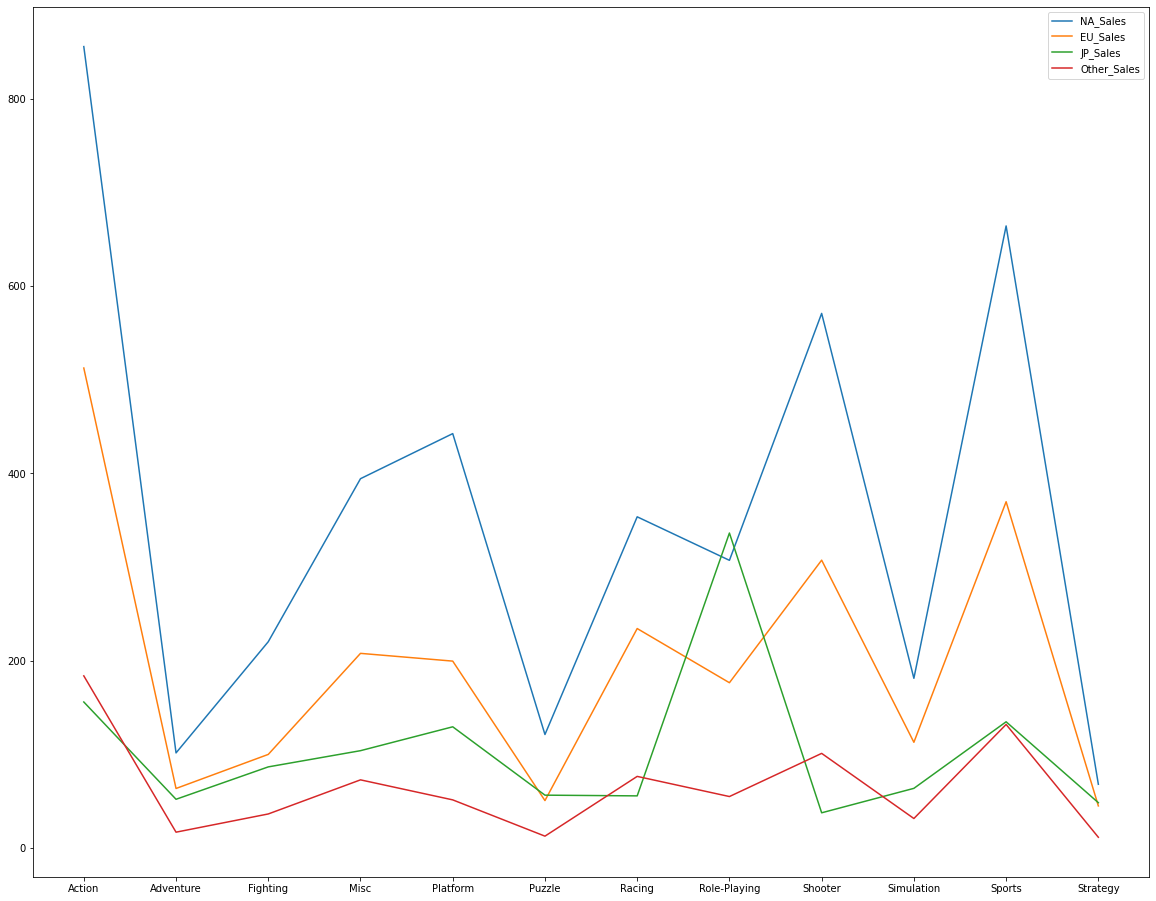

In [16]:
#선 시각화 (정규화 전)
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
plt.plot(obs_region['Genre'],obs_region['NA_Sales'])
plt.plot(obs_region['Genre'],obs_region['EU_Sales'])
plt.plot(obs_region['Genre'],obs_region['JP_Sales'])
plt.plot(obs_region['Genre'],obs_region['Other_Sales'])
plt.legend(Sales)
plt.show()

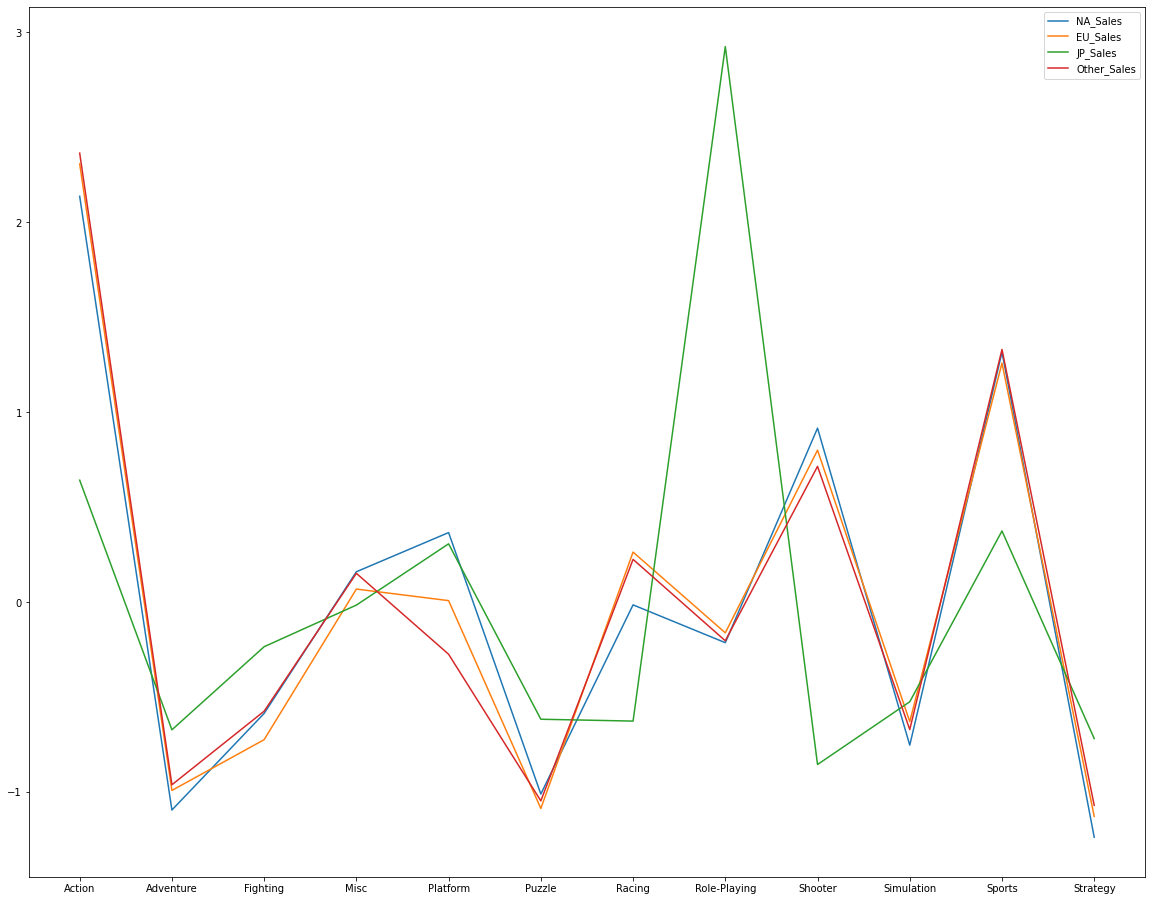

In [17]:
#선 시각화 (정규화 후)
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
plt.plot(obs_region_scaled['Genre'],obs_region_scaled['NA_Sales'])
plt.plot(obs_region_scaled['Genre'],obs_region_scaled['EU_Sales'])
plt.plot(obs_region_scaled['Genre'],obs_region_scaled['JP_Sales'])
plt.plot(obs_region_scaled['Genre'],obs_region_scaled['Other_Sales'])
plt.legend(Sales)
plt.show()

In [38]:
''' 효용성 없다고 판단
#바 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
plt.bar(obs_region['Genre'],obs_region['NA_Sales'])
plt.bar(obs_region['Genre'],obs_region['EU_Sales'])
plt.bar(obs_region['Genre'],obs_region['JP_Sales'])
plt.bar(obs_region['Genre'],obs_region['Other_Sales'])
plt.legend(Sales)
plt.show()
'''

" 효용성 없다고 판단\n#바 시각화\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(20, 16))\nplt.bar(obs_region['Genre'],obs_region['NA_Sales'])\nplt.bar(obs_region['Genre'],obs_region['EU_Sales'])\nplt.bar(obs_region['Genre'],obs_region['JP_Sales'])\nplt.bar(obs_region['Genre'],obs_region['Other_Sales'])\nplt.legend(Sales)\nplt.show()\n"

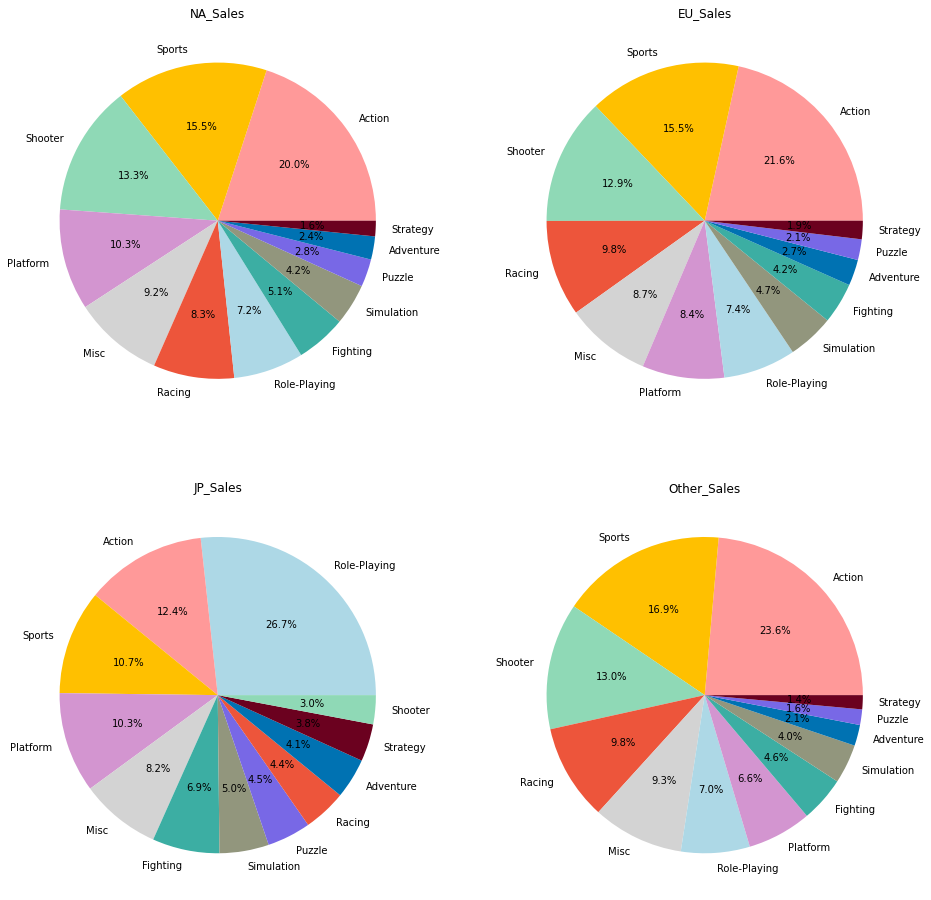

In [37]:
#파이 시각화
import matplotlib.pyplot as plt

obs_region_NA=obs_region.sort_values(by=['NA_Sales'], axis=0, ascending=False)
obs_region_EU=obs_region.sort_values(by=['EU_Sales'], axis=0, ascending=False)
obs_region_JP=obs_region.sort_values(by=['JP_Sales'], axis=0, ascending=False)
obs_region_Other=obs_region.sort_values(by=['Other_Sales'], axis=0, ascending=False)

plt.figure(figsize=(16, 16))
plt.subplot(221)
plt.title('NA_Sales')
plt.pie(obs_region_NA['NA_Sales'], labels=obs_region_NA['Genre'], autopct='%.1f%%',
        colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','lightgray','#ED553B','lightblue','#3CAEA3','#92967D','#7868E6','#0072B2','#6B011F'])
 
plt.subplot(222)
plt.title('EU_Sales')
plt.pie(obs_region_EU['EU_Sales'], labels=obs_region_EU['Genre'], autopct='%.1f%%',
        colors = ['#ff9999', '#ffc000', '#8fd9b6', '#ED553B','lightgray','#d395d0','lightblue','#92967D','#3CAEA3','#0072B2','#7868E6','#6B011F'])
 
plt.subplot(223)
plt.title('JP_Sales')
plt.pie(obs_region_JP['JP_Sales'], labels=obs_region_JP['Genre'], autopct='%.1f%%',
        colors = ['lightblue','#ff9999', '#ffc000', '#d395d0','lightgray','#3CAEA3','#92967D','#7868E6','#ED553B','#0072B2','#6B011F','#8fd9b6'])
 
plt.subplot(224)
plt.title('Other_Sales')
plt.pie(obs_region_Other['Other_Sales'], labels=obs_region_Other['Genre'], autopct='%.1f%%',
        colors = ['#ff9999', '#ffc000', '#8fd9b6', '#ED553B','lightgray','lightblue','#d395d0','#3CAEA3','#92967D','#0072B2','#7868E6','#6B011F'])

plt.show()

#colors_match=['Action','Sports','Shooter','Platform','Misc','Racing','Role-Playing','Fighting','Adventure','Puzzle','Simulation','Strategy']
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','lightgray','#ED553B','lightblue','#3CAEA3','#0072B2','#7868E6','#92967D','#6B011F']

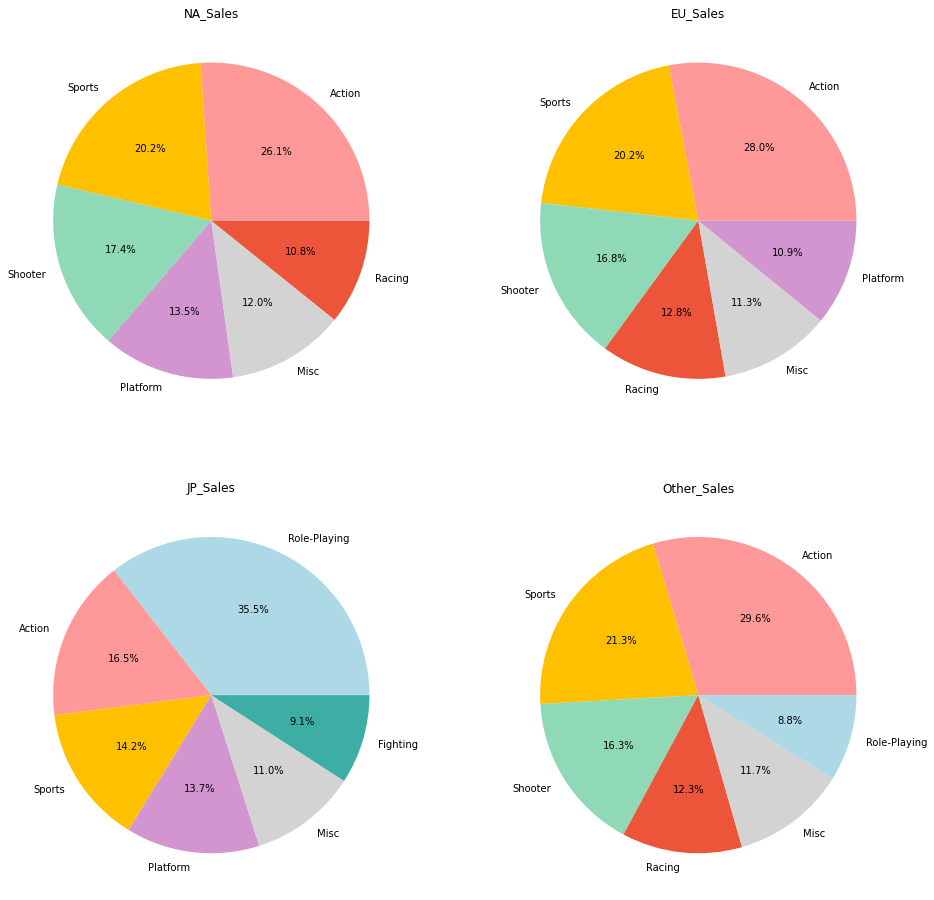

In [21]:
#파이 시각화 (상위 6개 /12개중)
import matplotlib.pyplot as plt

obs_region_NA=obs_region.sort_values(by=['NA_Sales'], axis=0, ascending=False)
obs_region_EU=obs_region.sort_values(by=['EU_Sales'], axis=0, ascending=False)
obs_region_JP=obs_region.sort_values(by=['JP_Sales'], axis=0, ascending=False)
obs_region_Other=obs_region.sort_values(by=['Other_Sales'], axis=0, ascending=False)

plt.figure(figsize=(16, 16))
plt.subplot(221)
plt.title('NA_Sales')
plt.pie(obs_region_NA['NA_Sales'][0:6], labels=obs_region_NA['Genre'][0:6], autopct='%.1f%%',colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','lightgray','#ED553B'])
 
plt.subplot(222)
plt.title('EU_Sales')
plt.pie(obs_region_EU['EU_Sales'][0:6], labels=obs_region_EU['Genre'][0:6], autopct='%.1f%%',colors = ['#ff9999', '#ffc000', '#8fd9b6', '#ED553B','lightgray','#d395d0'])
 
plt.subplot(223)
plt.title('JP_Sales')
plt.pie(obs_region_JP['JP_Sales'][0:6], labels=obs_region_JP['Genre'][0:6], autopct='%.1f%%',colors = ['lightblue','#ff9999', '#ffc000', '#d395d0','lightgray','#3CAEA3'])
 
plt.subplot(224)
plt.title('Other_Sales')
plt.pie(obs_region_Other['Other_Sales'][0:6], labels=obs_region_Other['Genre'][0:6], autopct='%.1f%%',colors = ['#ff9999', '#ffc000', '#8fd9b6', '#ED553B','lightgray','lightblue'])

plt.show()

#### 연도별 게임의 트렌드가 있을까 (게임의 트렌드라는 말을 장르로 인식) 
> 4가지의 Sales 칼럼을 모두 모은 Total_Sales 칼럼을 만들어, *x=출시연도 & y=Total_Sales & hue=장르*로 **선그래프**로시각화, 연도와 토탈세일에 대한 차이가 있는지 확인하기 위해 **T-test** 나 **chi-square-test**, **chi2_contingency**사용


In [39]:
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [40]:
year_genre=df2[['Year','Genre']]

Total_Sales=df2['NA_Sales']+df2['EU_Sales']+df2['JP_Sales']+df2['Other_Sales']
year_genre['Total_Sales']=Total_Sales
year_genre.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Year,Genre,Total_Sales
0,2008,Action,0.04
1,2009,Action,0.18
2,2010,Adventure,0.02
3,2010,Misc,0.04
4,2010,Platform,0.25


In [41]:
year_genre_com = pd.crosstab(df2['Genre'], df2['Year'])
year_genre_com


Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,1,25,18,7,1,2,6,2,2,2,3,5,1,6,4,7,20,29,44,39,43,66,125,144,124,191,182,210,218,270,226,238,263,148,186,250,117,1,0
Adventure,0,0,0,1,0,0,0,1,0,0,0,2,4,1,4,13,16,14,23,19,16,20,41,12,38,42,71,84,165,140,153,106,57,60,75,53,33,0,0
Fighting,1,0,0,0,0,1,0,2,0,0,0,1,7,11,21,28,30,28,41,24,29,18,54,44,39,43,54,50,56,53,40,49,29,19,22,21,14,0,0
Misc,4,0,1,1,1,0,0,0,0,1,0,1,2,3,6,22,23,12,21,25,20,26,44,53,67,110,109,150,208,204,200,183,37,41,41,38,17,0,0
Platform,0,3,5,5,1,4,5,2,4,3,3,6,6,11,11,13,14,18,24,18,23,43,77,84,64,82,54,42,62,28,31,37,11,37,10,14,10,0,0
Puzzle,0,2,3,1,3,4,0,0,1,5,2,4,5,3,3,12,9,14,13,6,12,15,20,7,24,32,42,63,63,78,44,41,11,3,7,6,0,0,0
Racing,0,1,2,0,3,0,1,0,1,0,2,1,2,2,8,12,20,36,47,49,43,70,102,107,70,76,75,83,82,83,57,63,30,16,27,19,19,0,0
Role-Playing,0,0,0,0,0,0,1,3,3,2,2,5,5,9,17,24,28,23,26,32,29,41,54,48,60,70,108,103,112,103,99,93,78,70,90,77,40,2,0
Shooter,2,10,5,1,3,1,4,2,1,1,0,3,3,2,11,28,23,27,23,16,19,36,78,73,88,96,67,84,82,89,80,92,47,59,47,34,31,0,0


#### 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 
> 위에서 만든 Total_Sales 라는 칼럼을 이용, **누적그래프**를 이용해서 출고량이 제일 많다는 것 보여주기, 출고량 상위 30가지 항목이용


#### 연도별 플랫폼에도 트렌드가 있을까 
> 4가지의 Sales 칼럼을 모두 모은 Total_Sales 칼럼을 만들어, *x=출시연도 & y=Total_Sales & hue=플랫폼*으로 **선그래프**로시각화, 연도와 토탈세일에 대한 차이가 있는지 확인하기 위해 **T-test** 나 **chi-square-test**, **chi2_contingency**사용


#### 제일 선호되는 회사와 지역에 따라서 선호하는 회사가 다를까 
> 전체적으로 랭킹 상위30 (575개의 회사), **파이그래프**로 각 지역에 따른 분포를 보여주기, 4개의 지역에 따른 회사 선호 장르를 차이를 따지기 위해 **ANOVA**사용(자국의 회사를 선호하는지?, 자국인지는 구글링 해보기)


#### 출시이후 평균 판매량은 어떤지 확인하기, 전체적으로도, 지역별로 그룹해서도, 또한 순위 재평가(상위 30개 게임)
> 출시이후 평균 판매량=총판매량/(지금년도-출시년도+1) 라는 수식을 사용(지금의 판매량은 누적이기 때문에 늦게 출시된 제품의 판매량이 떨어질 수 밖에 없다고 판단), 꾸준히 인기가 있는 게임이 있다면 원인은 무엇일까?